In [ ]:
#Source of data - Telcom Customer Churn Dataset
#Source-https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266\
#Source-https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction

#Goal-to see whether a customer will become a churner-yes or no

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) 
#doesn’t warrant raising an exception and terminating the program. 
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

#When using the 'inline' backend, your matplotlib graphs will be included in
#your notebook, next to the code.

%matplotlib inline


# Loading the CSV with pandas
data = pd.read_csv(r'C:\Users\Anakha\Documents\Flytxt\churndata.csv', na_values=[" "])

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dropping irrelevant data

In [ ]:
Here we drop the ID column as it doesnt give us any further information regarding churn.

In [ ]:
data.drop(['customerID'], axis=1, inplace=True)

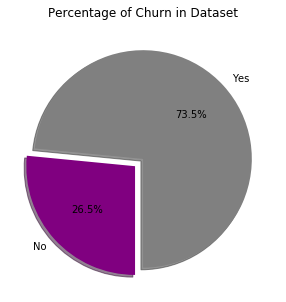

In [4]:
# Data to plot
sizes = data['Churn'].value_counts(sort = True)
labels=['Yes','No']
explode = (0, 0.1)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

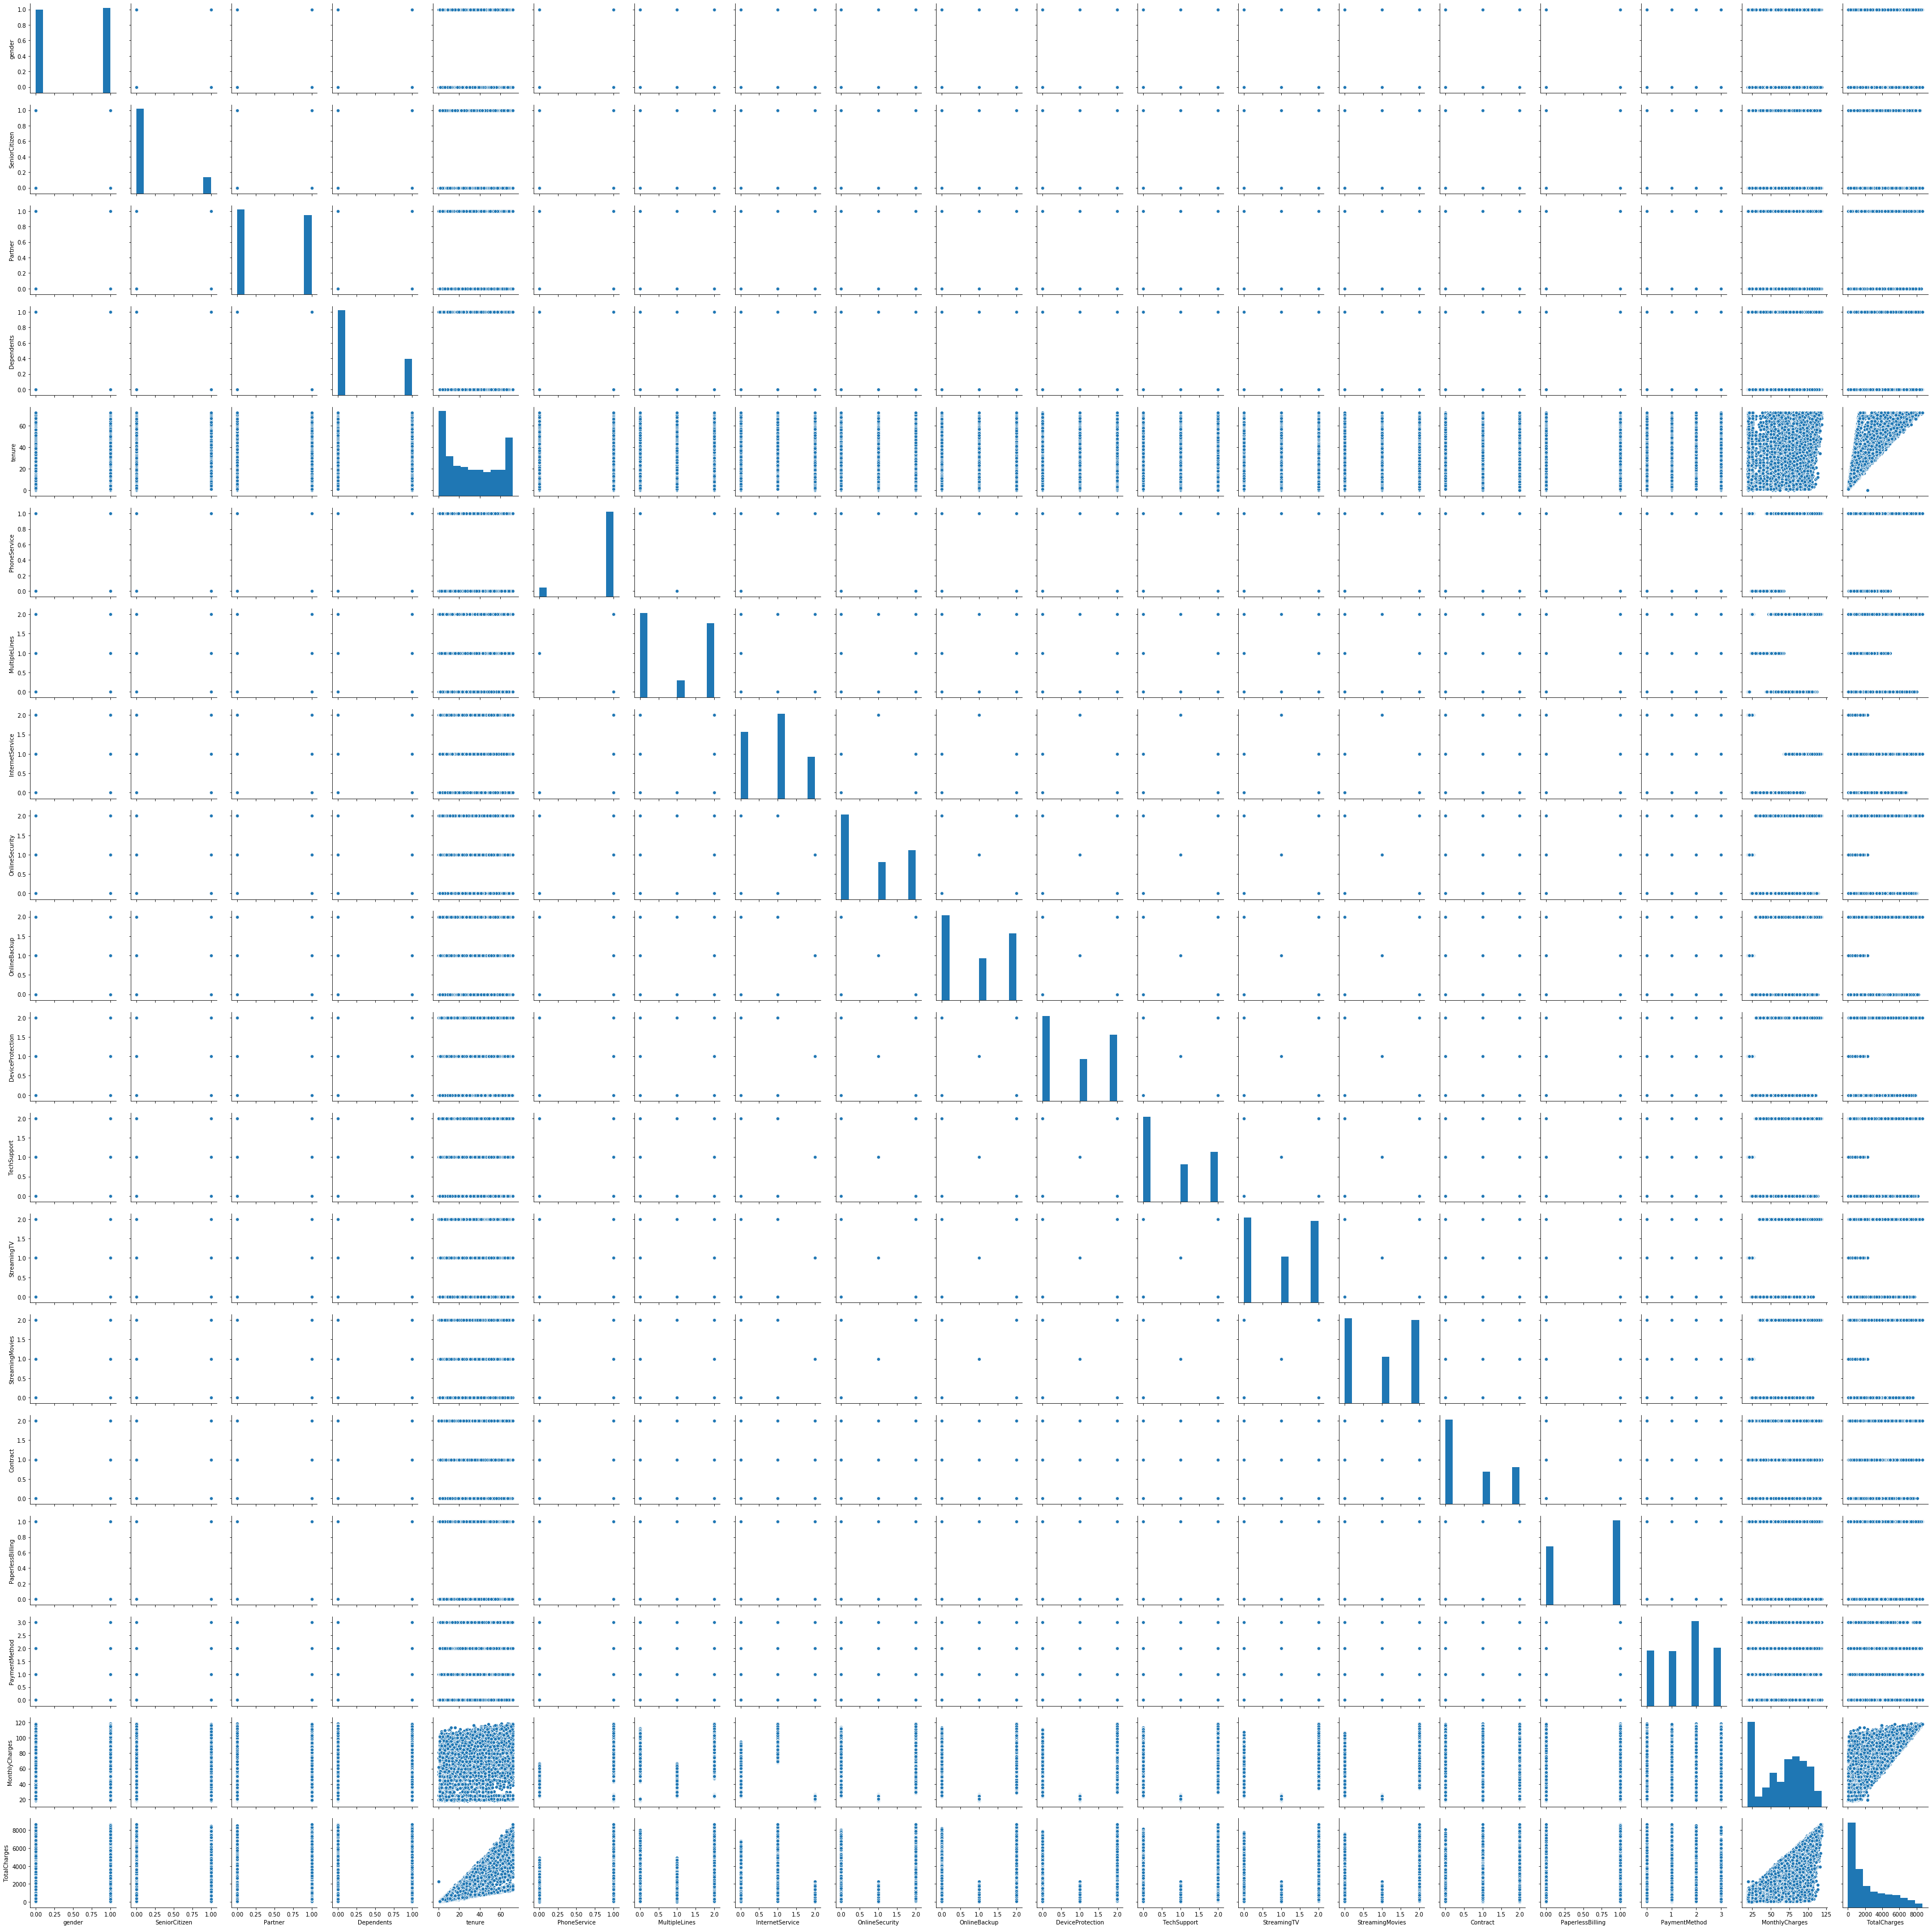

In [77]:
sns.pairplot(data)

# Data prep and Feature Engineering

### Missing values

In [6]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Categorical and numerical data

In [7]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Missing Value

In [8]:
#What to do about empty string

data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)
data['TotalCharges'].dtype

dtype('float64')

In [9]:
data['TotalCharges'].isnull().sum()

0

# Feature Selection for categorical variables

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

In [11]:
#getting categorical variables
categoricals=data.select_dtypes(exclude=[np.number])
categoricals.drop(['Churn'], axis=1, inplace=True)
categoricals.describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [12]:
#Finding unique values for each column
for item in categoricals.columns.values:
    count=categoricals[item].value_counts()
    print(count)

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [ ]:
#Note that some categories are actually the same like 
#In phone service-no and no phone service
#

### Encoding variables

In [13]:
#from diff place
#Converting categorical variables
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

#encoding all columns
for col in categoricals.columns:
    data[col]=label_encoder.fit_transform(data[col]) 
    categoricals[col]=label_encoder.fit_transform(categoricals[col]) 

#Adding Senior Citizens because it is a categorical variable
categoricals['SeniorCitizen']=data['SeniorCitizen'].values.tolist()



In [14]:
#Finding unique values for each column
for item in categoricals.columns.values:
    count=categoricals[item].value_counts()
    print(count)
    

1    3555
0    3488
Name: gender, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64
0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [15]:
categoricals['gender'].unique()

array([0, 1], dtype=int64)

### Chi Square Test

In [16]:
#Source-https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction

In [41]:
chi2_features = SelectKBest(chi2, k = 8) 
X_kbest_features = chi2_features.fit(categoricals, data['Churn']) 

In [42]:
print("scores")
print (X_kbest_features.scores_)
print ("P - Values")
print (X_kbest_features.pvalues_)


scores
[2.58698618e-01 8.24120826e+01 1.33036443e+02 9.72606249e-02
 9.74692078e+00 9.82102823e+00 5.51611529e+02 2.30086520e+02
 1.91303140e+02 5.23303866e+02 7.49020319e+00 8.23539949e+00
 1.11578017e+03 1.05680863e+02 5.84922505e+01 1.34351545e+02]
P - Values
[6.11015635e-001 1.10476396e-019 8.87672856e-031 7.55142091e-001
 1.79623344e-003 1.72527862e-003 5.61588231e-122 5.70786894e-052
 1.65153873e-043 8.08623624e-116 6.20355560e-003 4.10811292e-003
 1.22794132e-244 8.66198711e-025 2.04093269e-014 4.57695863e-031]


In [63]:
#create dataframe
score = pd.DataFrame({"features":categoricals.columns,"scores":X_kbest_features.scores_,"p_values":X_kbest_features.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
score=score.iloc[0:8,0]
score

12            Contract
6       OnlineSecurity
9          TechSupport
7         OnlineBackup
8     DeviceProtection
15       SeniorCitizen
2           Dependents
13    PaperlessBilling
Name: features, dtype: object

In [64]:
score=score.tolist()

In [66]:
#Taking top 8 features

newcategoricals=categoricals[score]
newcategoricals

,Contract,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,Dependents,PaperlessBilling
0,0,0,0,2,0,0,0,1
1,1,2,0,0,2,0,0,0
2,0,2,0,2,0,0,0,1
3,1,2,2,0,2,0,0,0
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
7038,1,2,2,0,2,0,1,1
7039,1,0,0,2,2,0,1,1
7040,0,2,0,0,0,0,1,1
7041,0,0,0,0,0,1,0,1


# Numeric types

In [46]:
numeric=data.drop(categoricals.columns,axis=1)
numeric=numeric.drop(['Churn'],axis=1)
numeric.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Random forest with all features


In [47]:
#Splitting original data 
X=data.drop('Churn', axis=1)
y=data['Churn']  #target

In [48]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [49]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
predictions=clf.predict(X_test)

### Confusion Matrix

In [51]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[1410,  129],
       [ 296,  278]], dtype=int64)

In [52]:
#Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, pos_label='Yes'))
print("Recall:",metrics.recall_score(y_test, predictions, pos_label='Yes'))

#default pos_label=1 

Accuracy: 0.7988641741599621
Precision: 0.683046683046683
Recall: 0.4843205574912892


Text(0.5, 320.8, 'Predicted label')

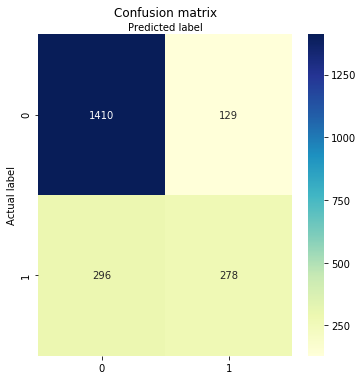

In [53]:
class_names=['no', 'yes'] # name  of classes
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC Curve

In [54]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
y_test_dummies=pd.get_dummies(y_test)
predictions_dummies=pd.get_dummies(predictions)
auc = roc_auc_score(y_test_dummies, predictions_dummies)
print('AUC: %.3f' % auc)

AUC: 0.700


# Random forest with selected features

In [67]:
#Creating dataframe of selected features and target variable-churn
newdata=data[newcategoricals.columns.tolist()+numeric.columns.tolist()]
newdata['Churn']=data['Churn']
newdata

,Contract,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,SeniorCitizen,Dependents,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,0,2,0,0,0,1,1,29.85,29.85,No
1,1,2,0,0,2,0,0,0,34,56.95,1889.50,No
2,0,2,0,2,0,0,0,1,2,53.85,108.15,Yes
3,1,2,2,0,2,0,0,0,45,42.30,1840.75,No
4,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,2,2,0,2,0,1,1,24,84.80,1990.50,No
7039,1,0,0,2,2,0,1,1,72,103.20,7362.90,No
7040,0,2,0,0,0,0,1,1,11,29.60,346.45,No
7041,0,0,0,0,0,1,0,1,4,74.40,306.60,Yes


In [68]:
#Splitting original data 
Xnew=newdata.drop('Churn', axis=1)
ynew=newdata['Churn']  #target

In [69]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split( Xnew, ynew, test_size=0.3, random_state=42)

In [70]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clfnew = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clfnew.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
predictions_new=clfnew.predict(X_test_new)

### Confusion matrix

In [72]:
# import the metrics class
from sklearn import metrics
cnf_matrix_new = metrics.confusion_matrix(y_test_new, predictions_new)
cnf_matrix_new

array([[1385,  154],
       [ 300,  274]], dtype=int64)

In [73]:
#Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test_new, predictions_new))
print("Precision:",metrics.precision_score(y_test_new, predictions_new, pos_label='Yes'))
print("Recall:",metrics.recall_score(y_test_new, predictions_new, pos_label='Yes'))

#default pos_label=1 

Accuracy: 0.7851396119261713
Precision: 0.6401869158878505
Recall: 0.47735191637630664


### ROC Curve

In [74]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate AUC
y_test_dummies_new=pd.get_dummies(y_test_new)
predictions_dummies_new=pd.get_dummies(predictions_new)
auc = roc_auc_score(y_test_dummies_new, predictions_dummies_new)
print('AUC: %.3f' % auc)

AUC: 0.689
